<a href="https://colab.research.google.com/github/Diegohernando05/DIEGO-HERNANDO-ARANGO-RIOS/blob/main/1_Data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## KEEPOUTPUT
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("dataset.csv")
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [ ]:
# Tamaño del dataset posterior a la limpieza
print(df.shape)

(4424, 35)


In [ ]:
# Cuantos valores nulos hay por item?
df.isna().sum()


Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Esto nos muestra que no hay valores nulos ya que se realizo la limpieza de estos:

In [ ]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

Como podemos observar se desea predecir el target correspondiente a tres valores:
- Abandono (Dropout)
- Graduado (Graduate)
- Matriculado (Enrolled)

Las caracteristicas de cada estudiante que se poseen son:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

Es decir, que todos los datos que se poseen son de tipo entero o flotante a excepción del Target que es un string.

Una inspección rápida nos deja ver que una descripción rápida de las variables contenidas:

In [ ]:
df._get_numeric_data().describe().T

count       mean        std  \
Marital status                                  4424.0   1.178571   0.605747   
Application mode                                4424.0   6.886980   5.298964   
Application order                               4424.0   1.727848   1.313793   
Course                                          4424.0   9.899186   4.331792   
Daytime/evening attendance                      4424.0   0.890823   0.311897   
Previous qualification                          4424.0   2.531420   3.963707   
Nacionality                                     4424.0   1.254521   1.748447   
Mother's qualification                          4424.0  12.322107   9.026251   
Father's qualification                          4424.0  16.455244  11.044800   
Mother's occupation                             4424.0   7.317812   3.997828   
Father's occupation                             4424.0   7.819168   4.856692   
Displaced                                       4424.0   0.548373   0.497711   
Educational special needs                       4424.0   0.011528   0.106760   
Debtor                                          4424.0   0.113698   0.317480   
Tuition fees up to date                         4424.0   0.880651   0.324235   
Gender                                          4424.0   0.351718   0.477560   
Scholarship holder                              4424.0   0.248418   0.432144   
Age at enrollment                               4424.0  23.265145   7.587816   
International                                   4424.0   0.024864   0.155729   
Curricular units 1st sem (credited)             4424.0   0.709991   2.360507   
Curricular units 1st sem (enrolled)             4424.0   6.270570   2.480178   
Curricular units 1st sem (evaluations)          4424.0   8.299051   4.179106   
Curricular units 1st sem (approved)             4424.0   4.706600   3.094238   
Curricular units 1st sem (grade)                4424.0  10.640822   4.843663   
Curricular units 1st sem (without evaluations)  4424.0   0.137658   0.690880   
Curricular units 2nd sem (credited)             4424.0   0.541817   1.918546   
Curricular units 2nd sem (enrolled)             4424.0   6.232143   2.195951   
Curricular units 2nd sem (evaluations)          4424.0   8.063291   3.947951   
Curricular units 2nd sem (approved)             4424.0   4.435805   3.014764   
Curricular units 2nd sem (grade)                4424.0  10.230206   5.210808   
Curricular units 2nd sem (without evaluations)  4424.0   0.150316   0.753774   
Unemployment rate                               4424.0  11.566139   2.663850   
Inflation rate                                  4424.0   1.228029   1.382711   
GDP                                             4424.0   0.001969   2.269935   

                                                  min    25%        50%  \
Marital status                                   1.00   1.00   1.000000   
Application mode                                 1.00   1.00   8.000000   
Application order                                0.00   1.00   1.000000   
Course                                           1.00   6.00  10.000000   
Daytime/evening attendance                       0.00   1.00   1.000000   
Previous qualification                           1.00   1.00   1.000000   
Nacionality                                      1.00   1.00   1.000000   
Mother's qualification                           1.00   2.00  13.000000   
Father's qualification                           1.00   3.00  14.000000   
Mother's occupation                              1.00   5.00   6.000000   
Father's occupation                              1.00   5.00   8.000000   
Displaced                                        0.00   0.00   1.000000   
Educational special needs                        0.00   0.00   0.000000   
Debtor                                           0.00   0.00   0.000000   
Tuition fees up to date                          0.00   1.00   1.000000   
Gender                                          

Identifiquemos la correlación entre variables a ver si logramos dislumbrar algunas variables que posean mayor correlación entre si:

<ipython-input-10-a415e0e9dc3d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


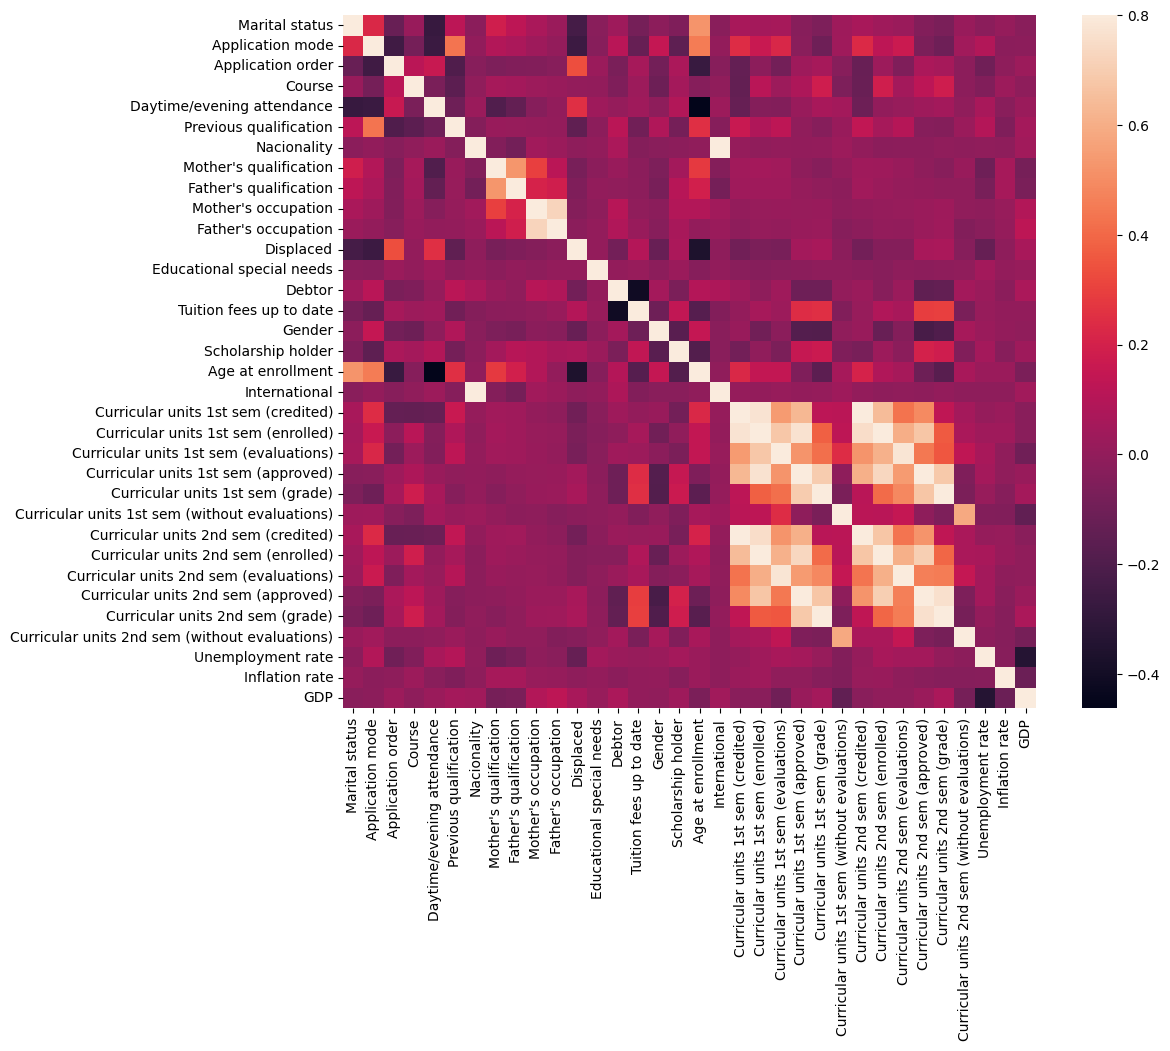

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Se observa una fuerte correlación positiva entre:
- International y Nacionality
- y los Curricular units oara 1 sem y 2 sem en las mismas categorias y un poco entre las asociadas.

Y una correlación negativa entre:

- Age at enrollment con Daytime/evening attendance y Displaced

- Tuition fees up to date con Debtor

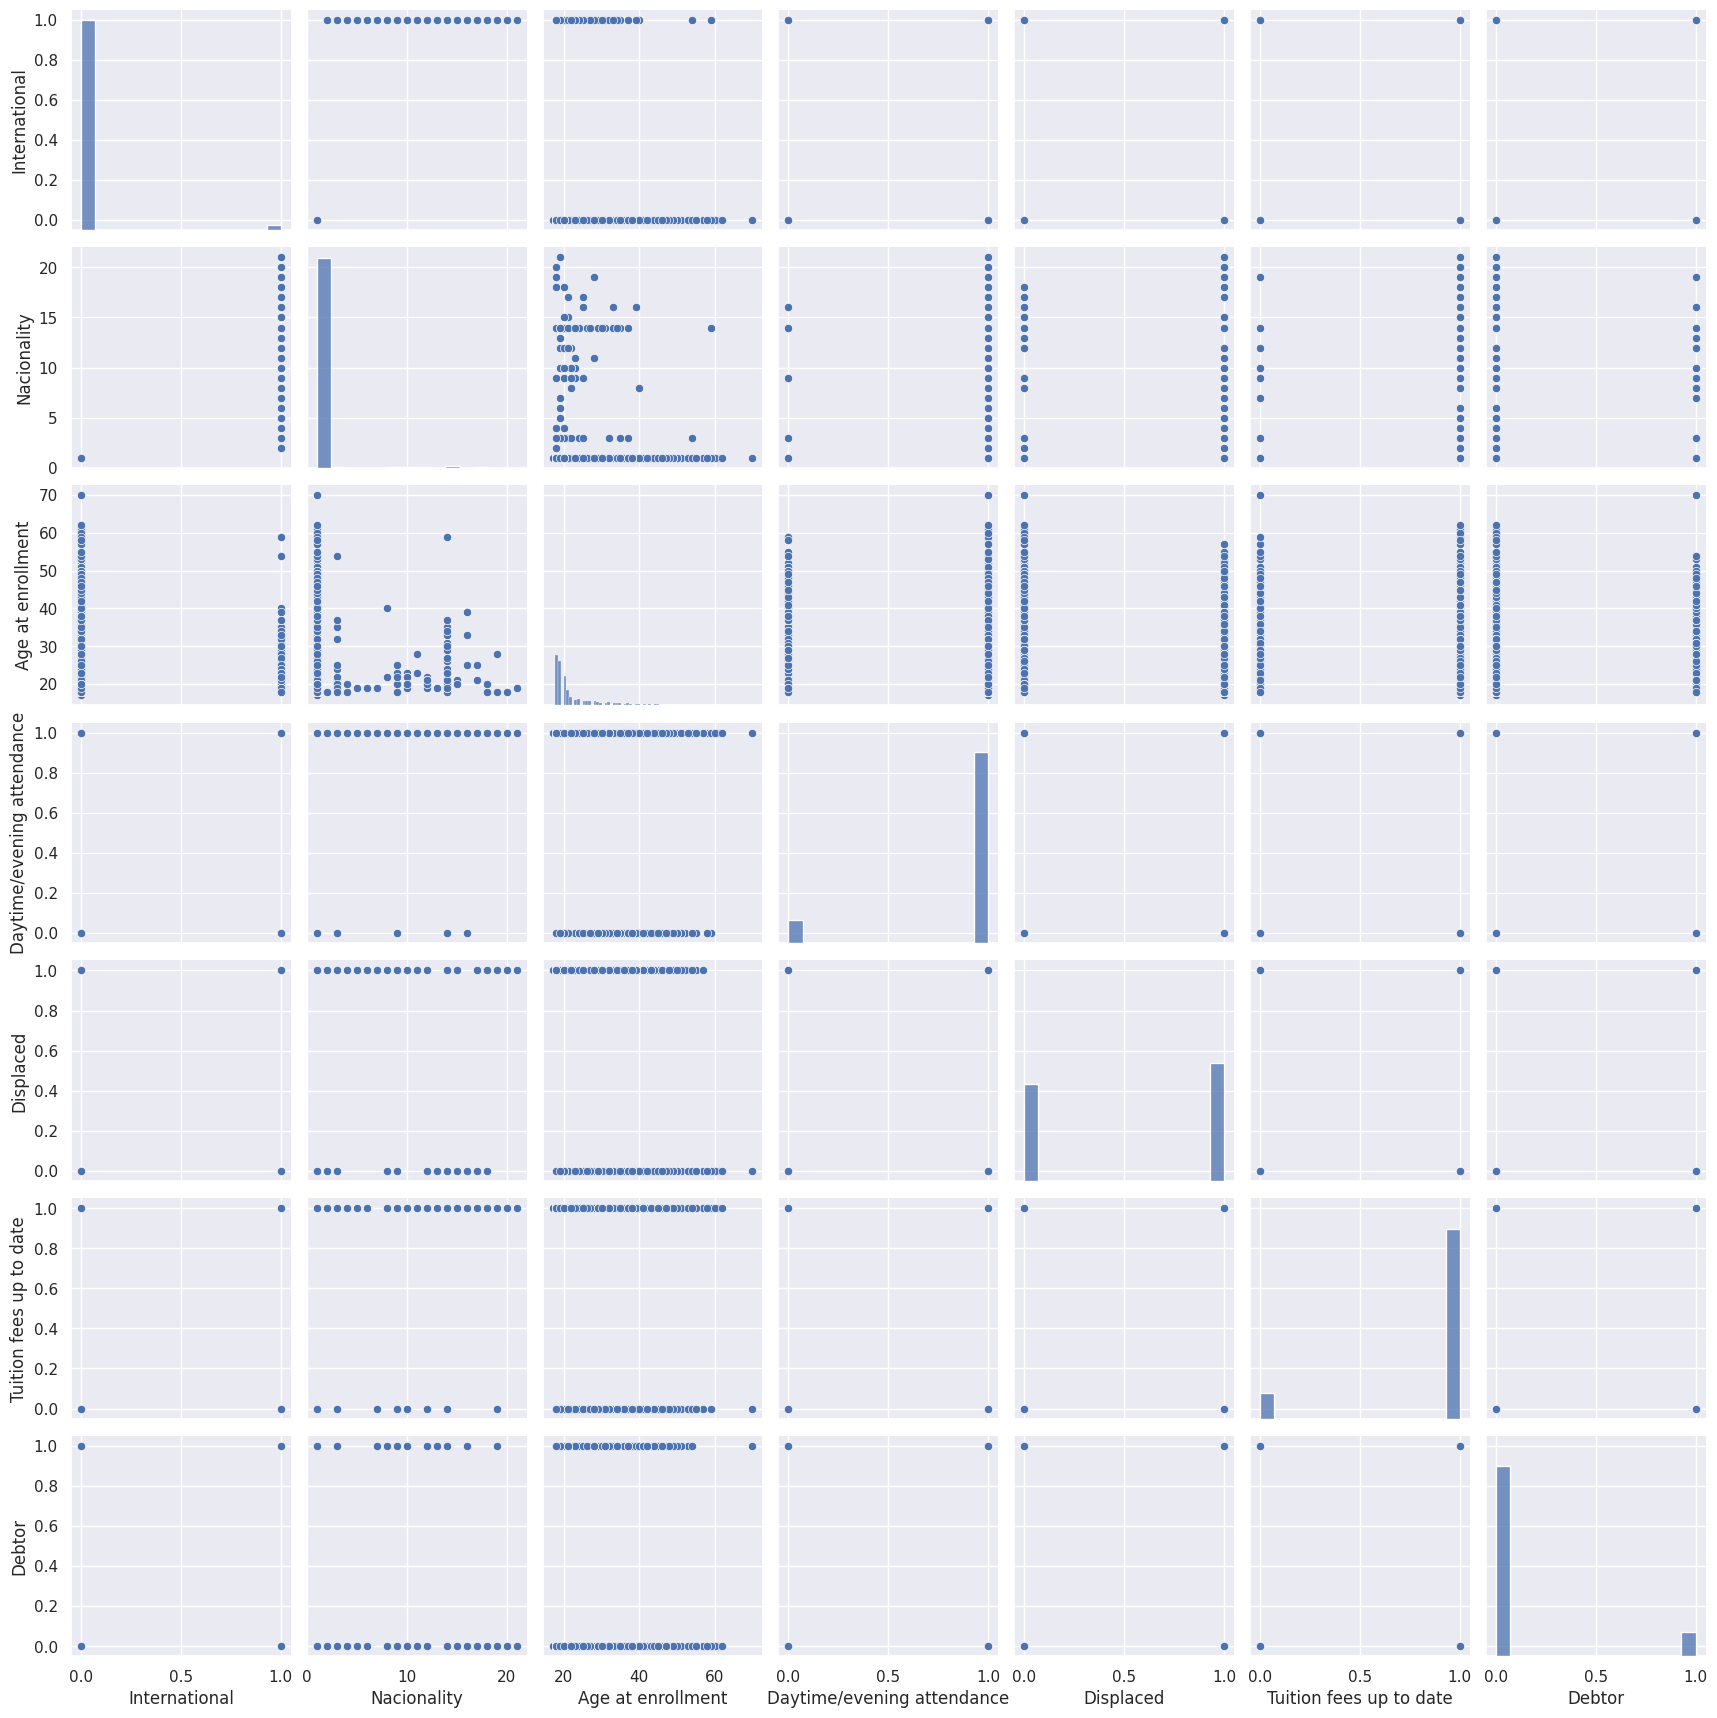

In [ ]:
cols =["International","Nacionality","Age at enrollment","Daytime/evening attendance","Displaced","Tuition fees up to date","Debtor" ]
sns.set()
sns.pairplot(df[cols])

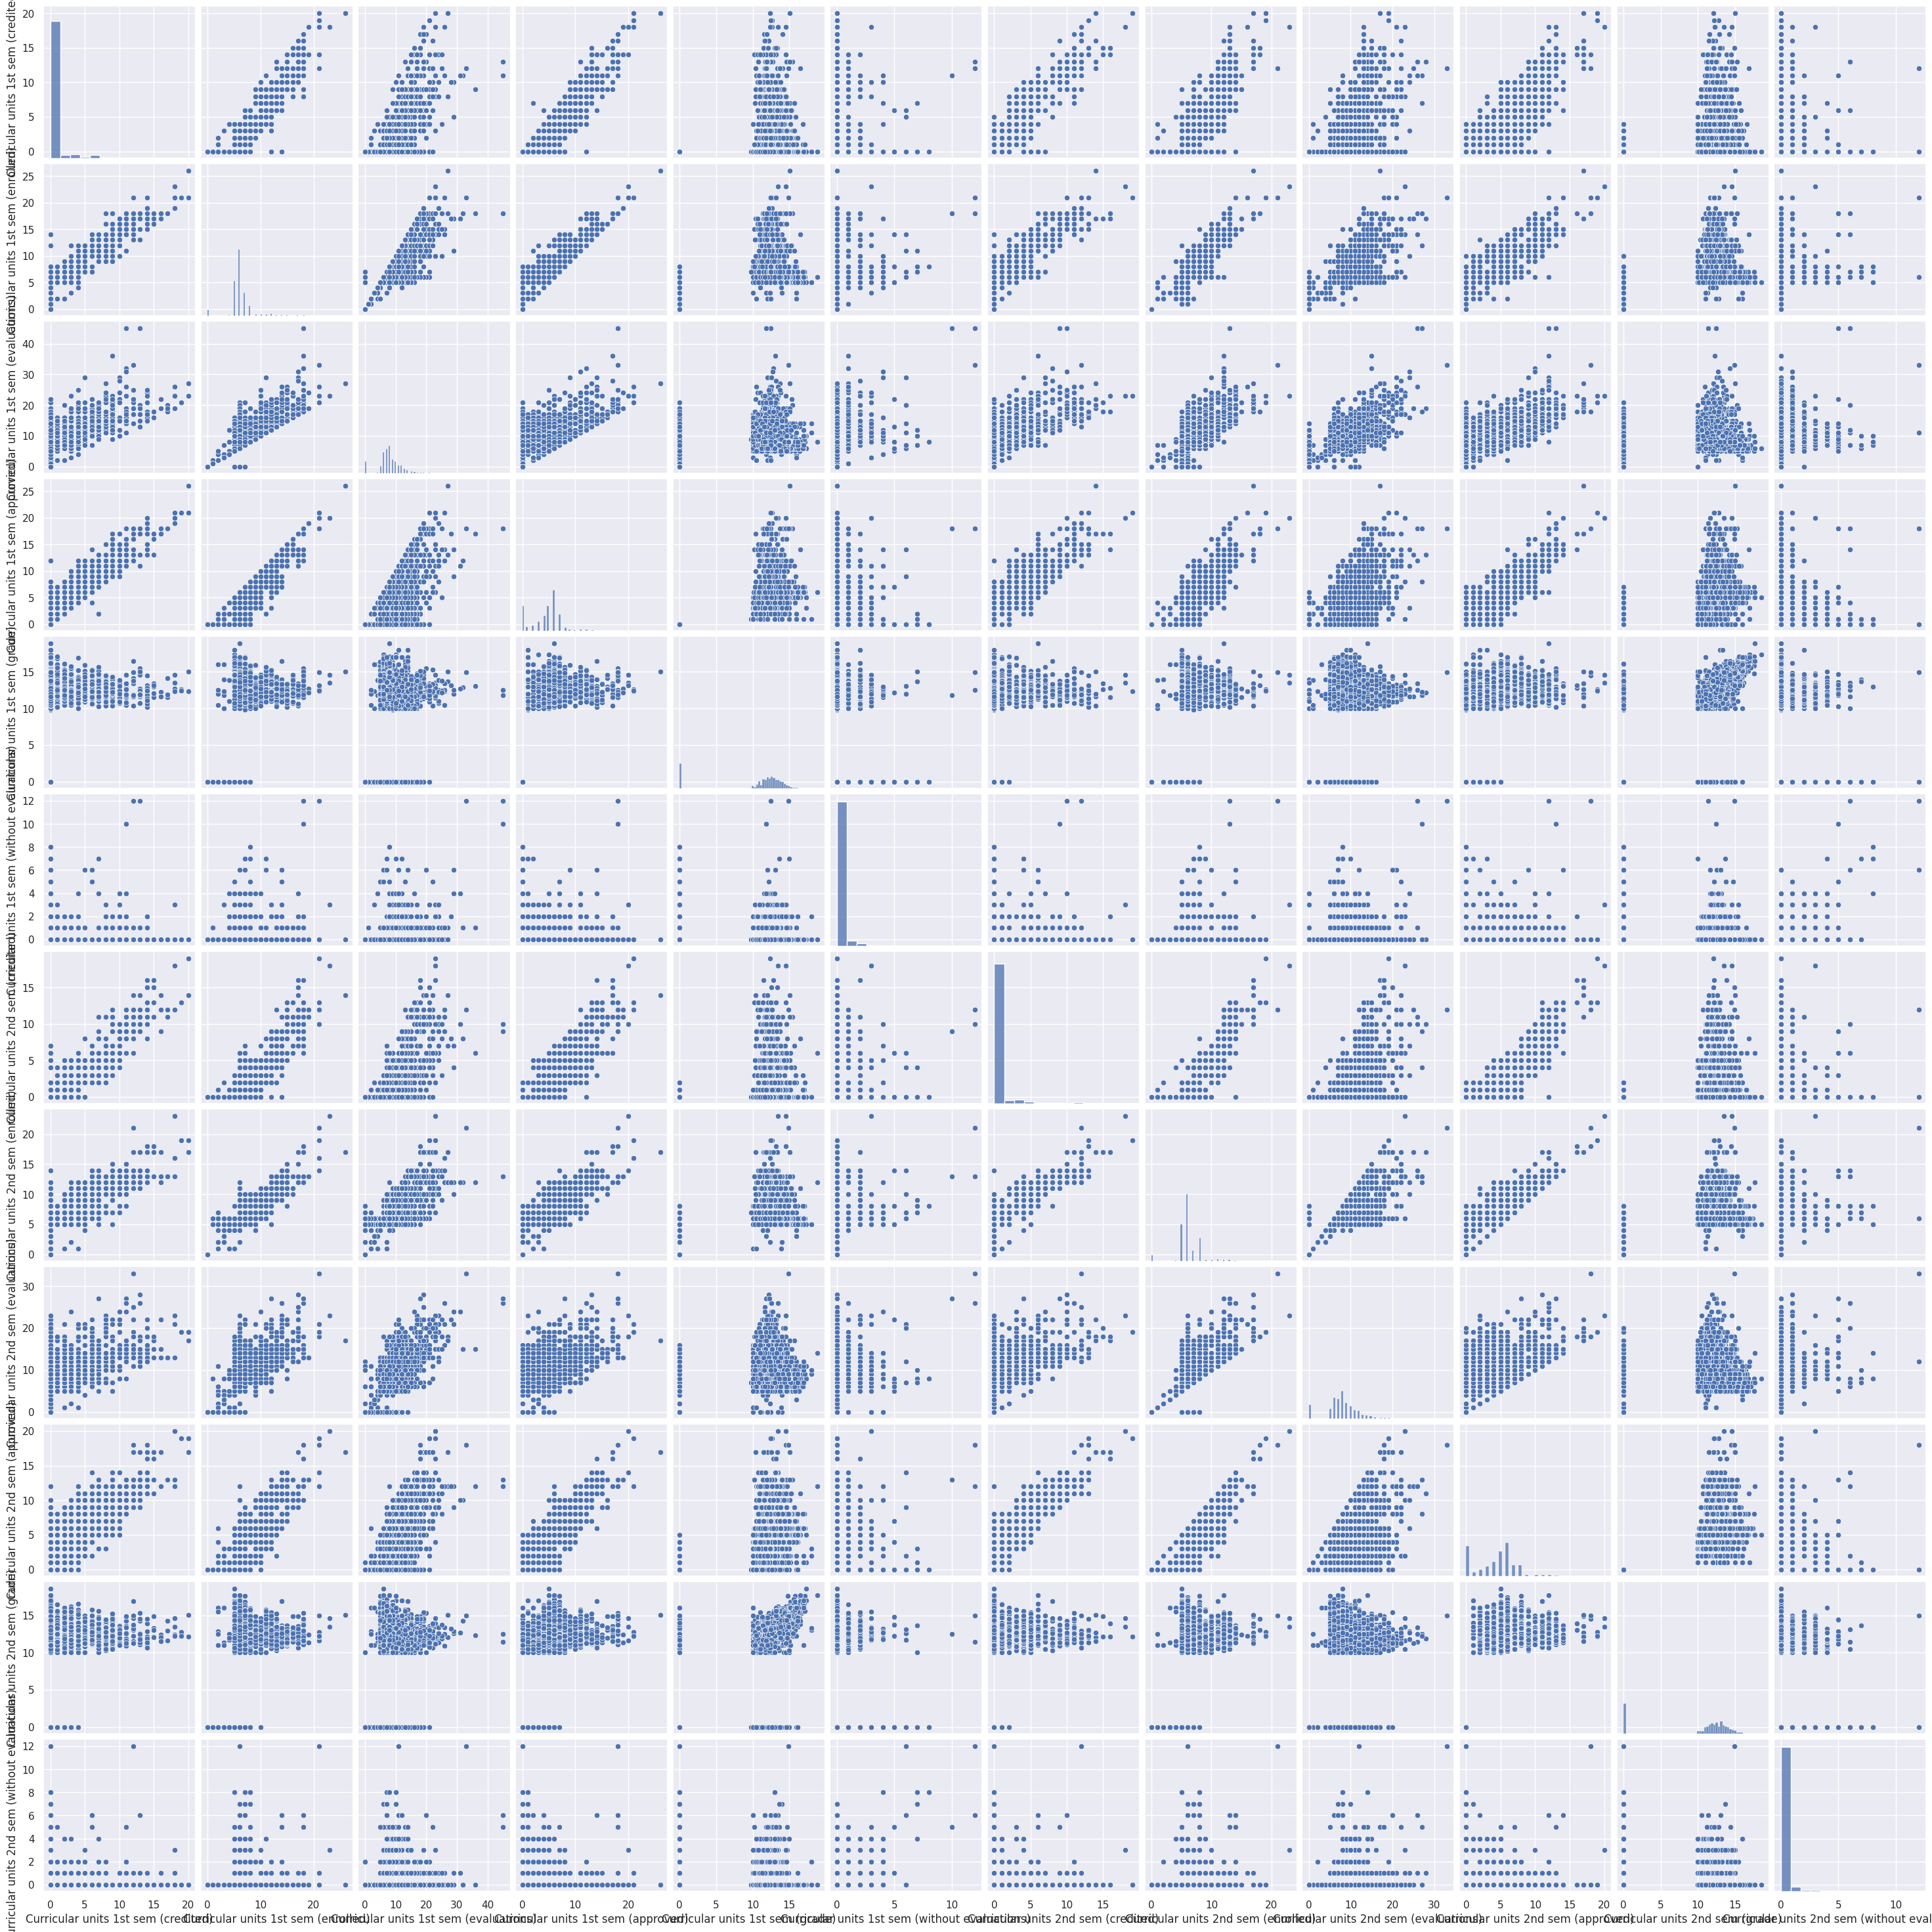

In [ ]:
cols=df.columns[df.columns.str.find("Curricular")==0]
sns.set()
sns.pairplot(df[cols])

De la última gráfica se observa una clara correlación entre:

In [ ]:
i=[0,0,0,0,0,1,1,1,1,1,2,2,2,3,3,3,6,6,7,7]
j=[1,3,6,7,9,2,3,6,7,9,3,7,9,6,7,9,7,9,8,9]
print("Estan correlacionados los siguientes parámetros:")
for k in range(len(i)):
  print("- "+cols[i[k]]+" con "+cols[j[k]])

Estan correlacionados los siguientes parámetros:
- Curricular units 1st sem (credited) con Curricular units 1st sem (enrolled)
- Curricular units 1st sem (credited) con Curricular units 1st sem (approved)
- Curricular units 1st sem (credited) con Curricular units 2nd sem (credited)
- Curricular units 1st sem (credited) con Curricular units 2nd sem (enrolled)
- Curricular units 1st sem (credited) con Curricular units 2nd sem (approved)
- Curricular units 1st sem (enrolled) con Curricular units 1st sem (evaluations)
- Curricular units 1st sem (enrolled) con Curricular units 1st sem (approved)
- Curricular units 1st sem (enrolled) con Curricular units 2nd sem (credited)
- Curricular units 1st sem (enrolled) con Curricular units 2nd sem (enrolled)
- Curricular units 1st sem (enrolled) con Curricular units 2nd sem (approved)
- Curricular units 1st sem (evaluations) con Curricular units 1st sem (approved)
- Curricular units 1st sem (evaluations) con Curricular units 2nd sem (enrolled)
- Curr

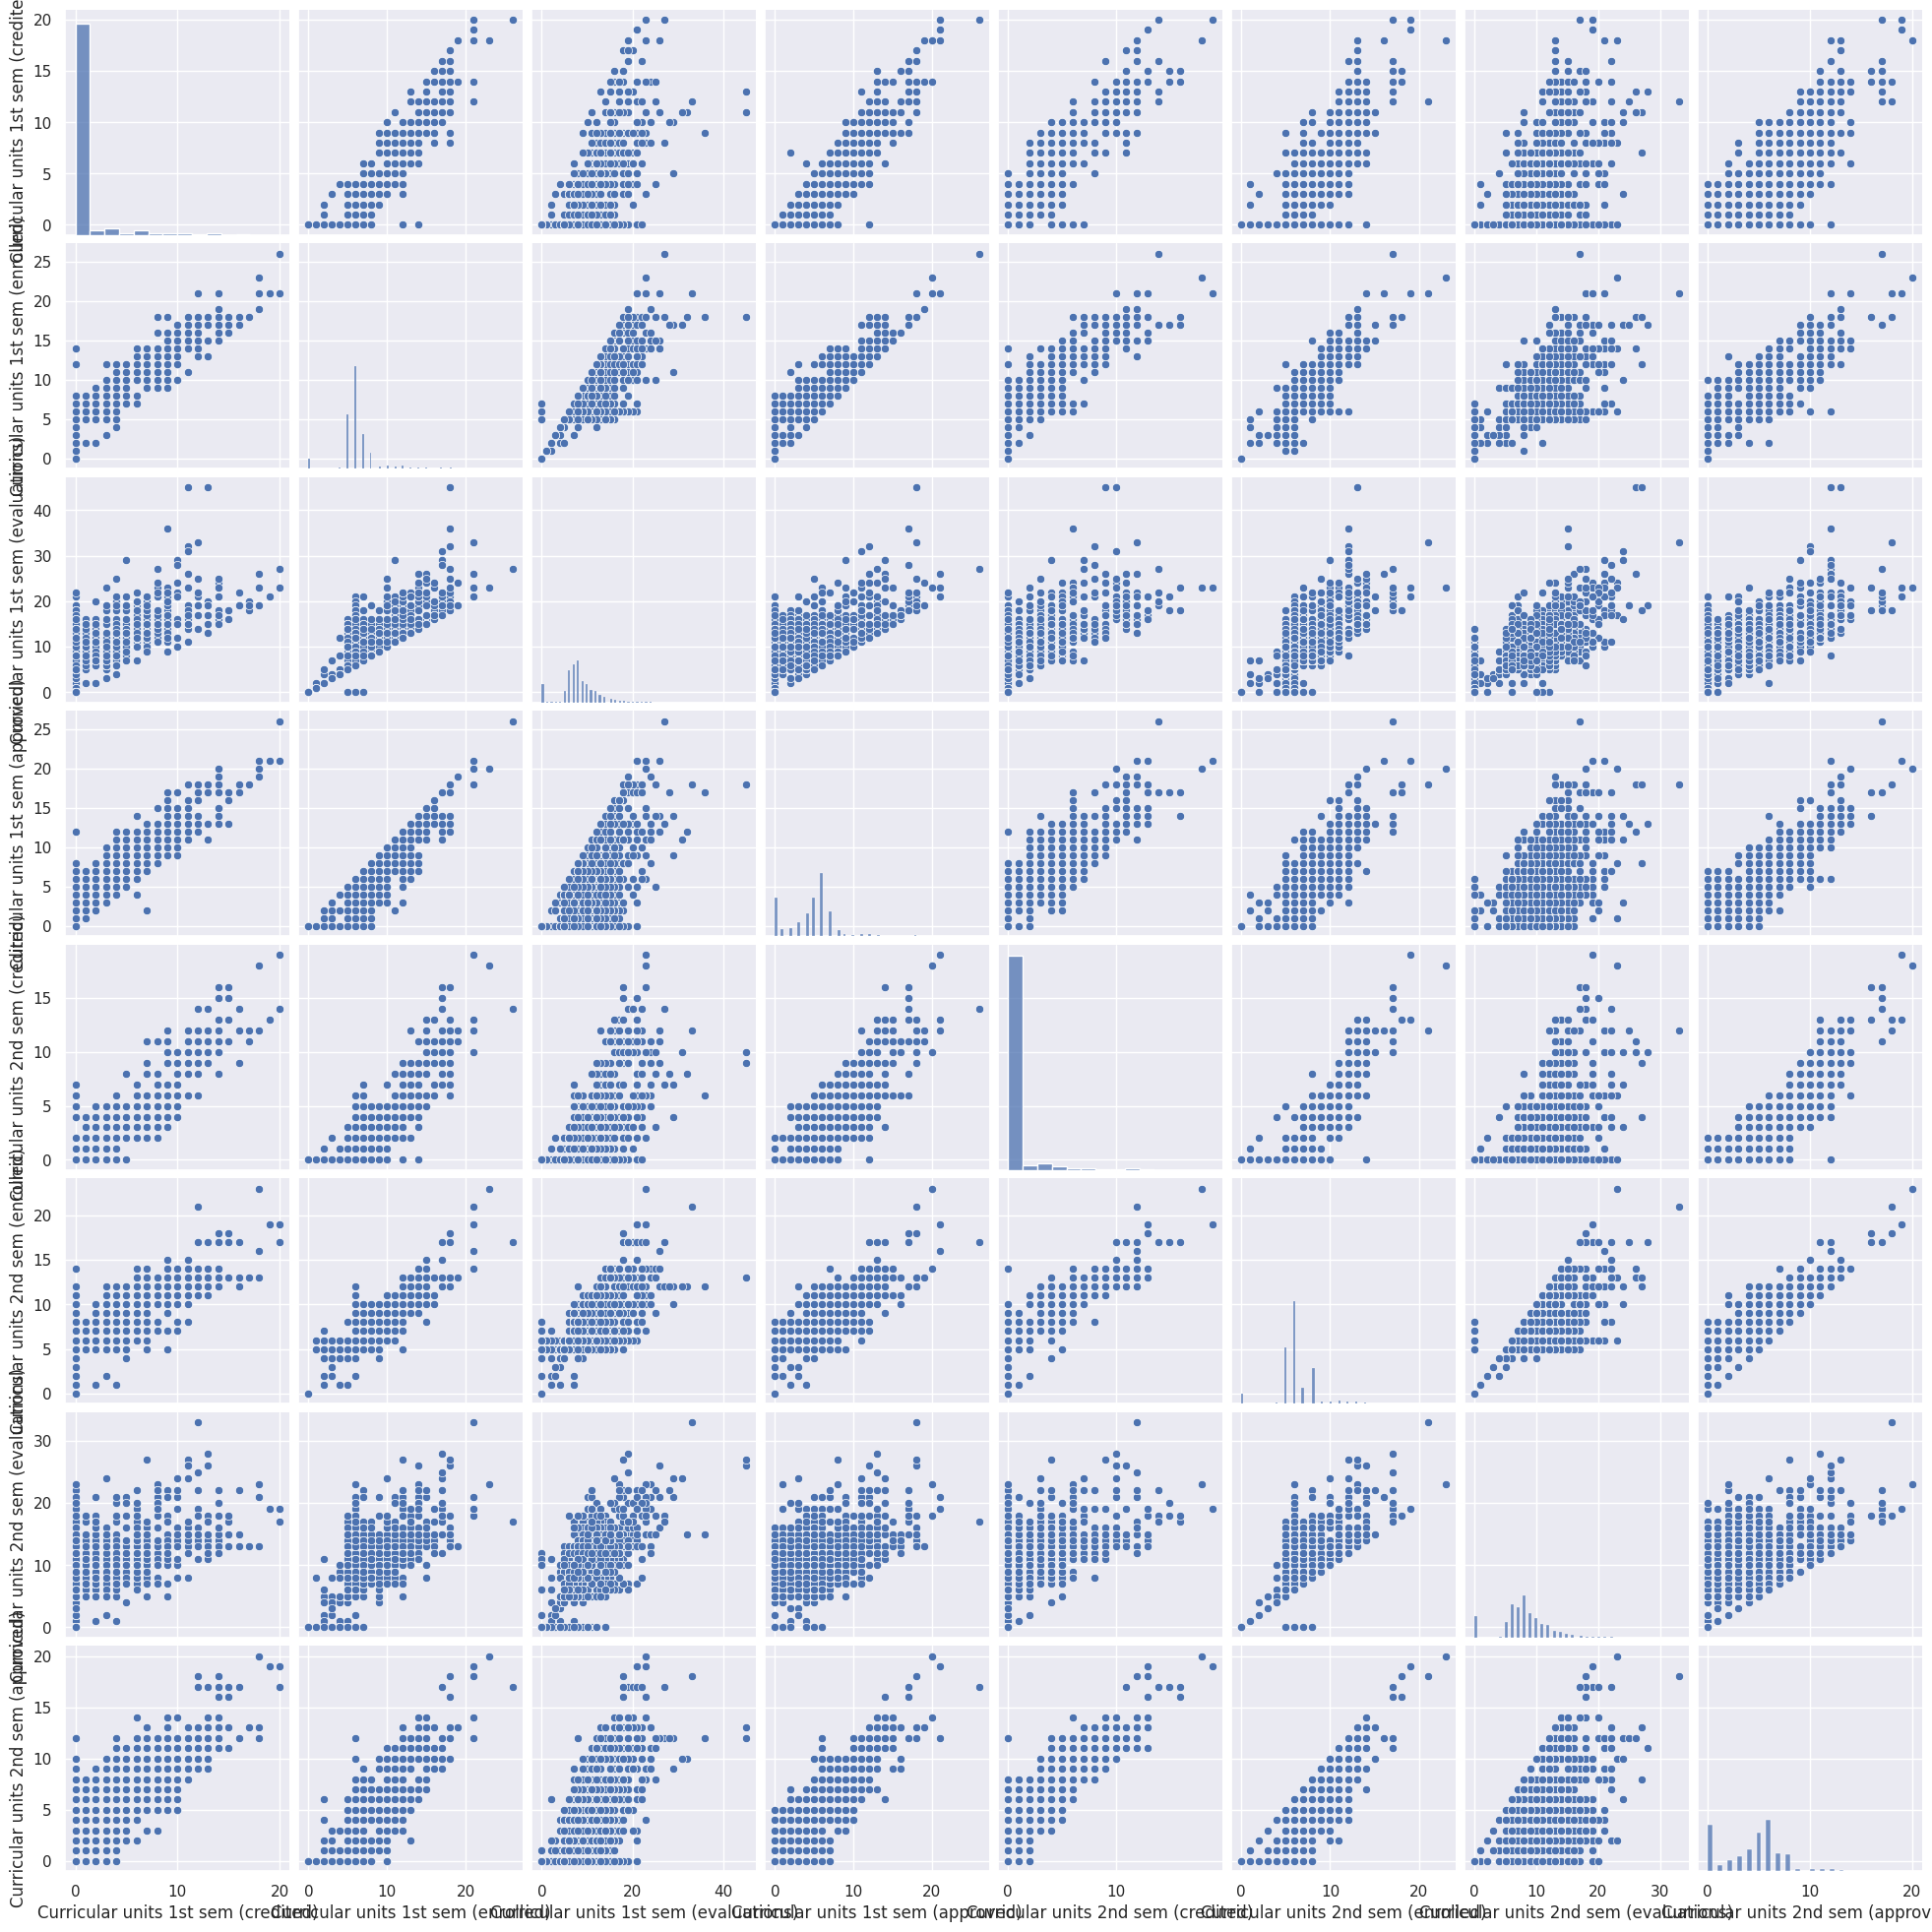

In [ ]:
cols=cols[[0,1,2,3,6,7,8,9]]
sns.set()
sns.pairplot(df[cols])

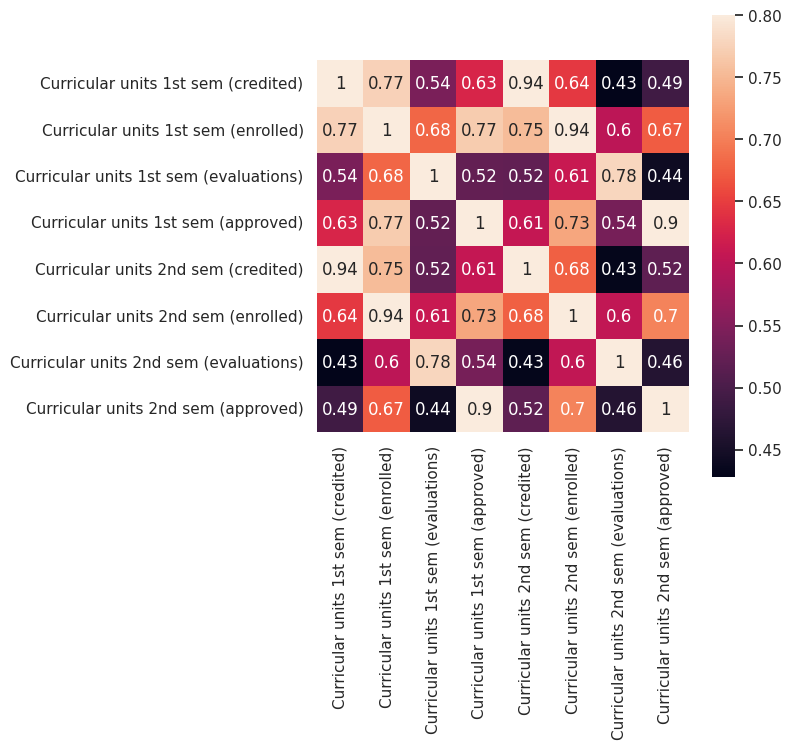

In [ ]:
corrmat = df[cols].corr()
f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corrmat, vmax=.8,annot=True, square=True);

De los últimos análisis observamos que en general hay una correlación entre:

- 'Curricular units 1st sem (credited)'
- 'Curricular units 1st sem (enrolled)'
- 'Curricular units 1st sem (evaluations)'
- 'Curricular units 1st sem (approved)'
- 'Curricular units 2nd sem (credited)'
- 'Curricular units 2nd sem (enrolled)'
- 'Curricular units 2nd sem (evaluations)'
- 'Curricular units 2nd sem (approved)'

y la correlación mayor esta ente los mismo items para 1st sem y 2 st sem, permitiendo con así poder hacer una descripción de estos parámetros solo considerando los valores de Curricular para 1st sem.

<Axes: xlabel='Target', ylabel='Count'>

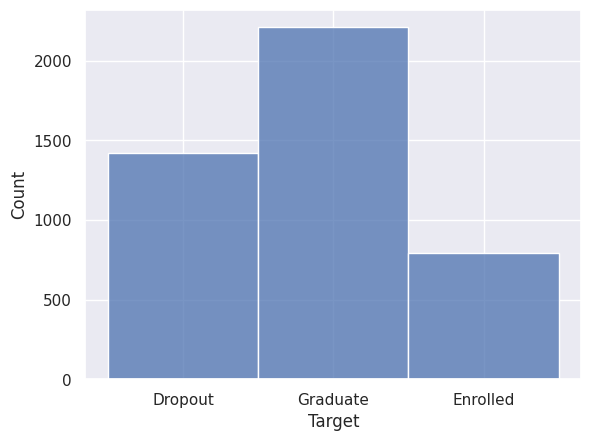

In [ ]:
sns.histplot(df.Target)

In [ ]:
col=df.columns[df.columns.str.find("Curricular")==0]
col

Index(['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)'],
      dtype='object')

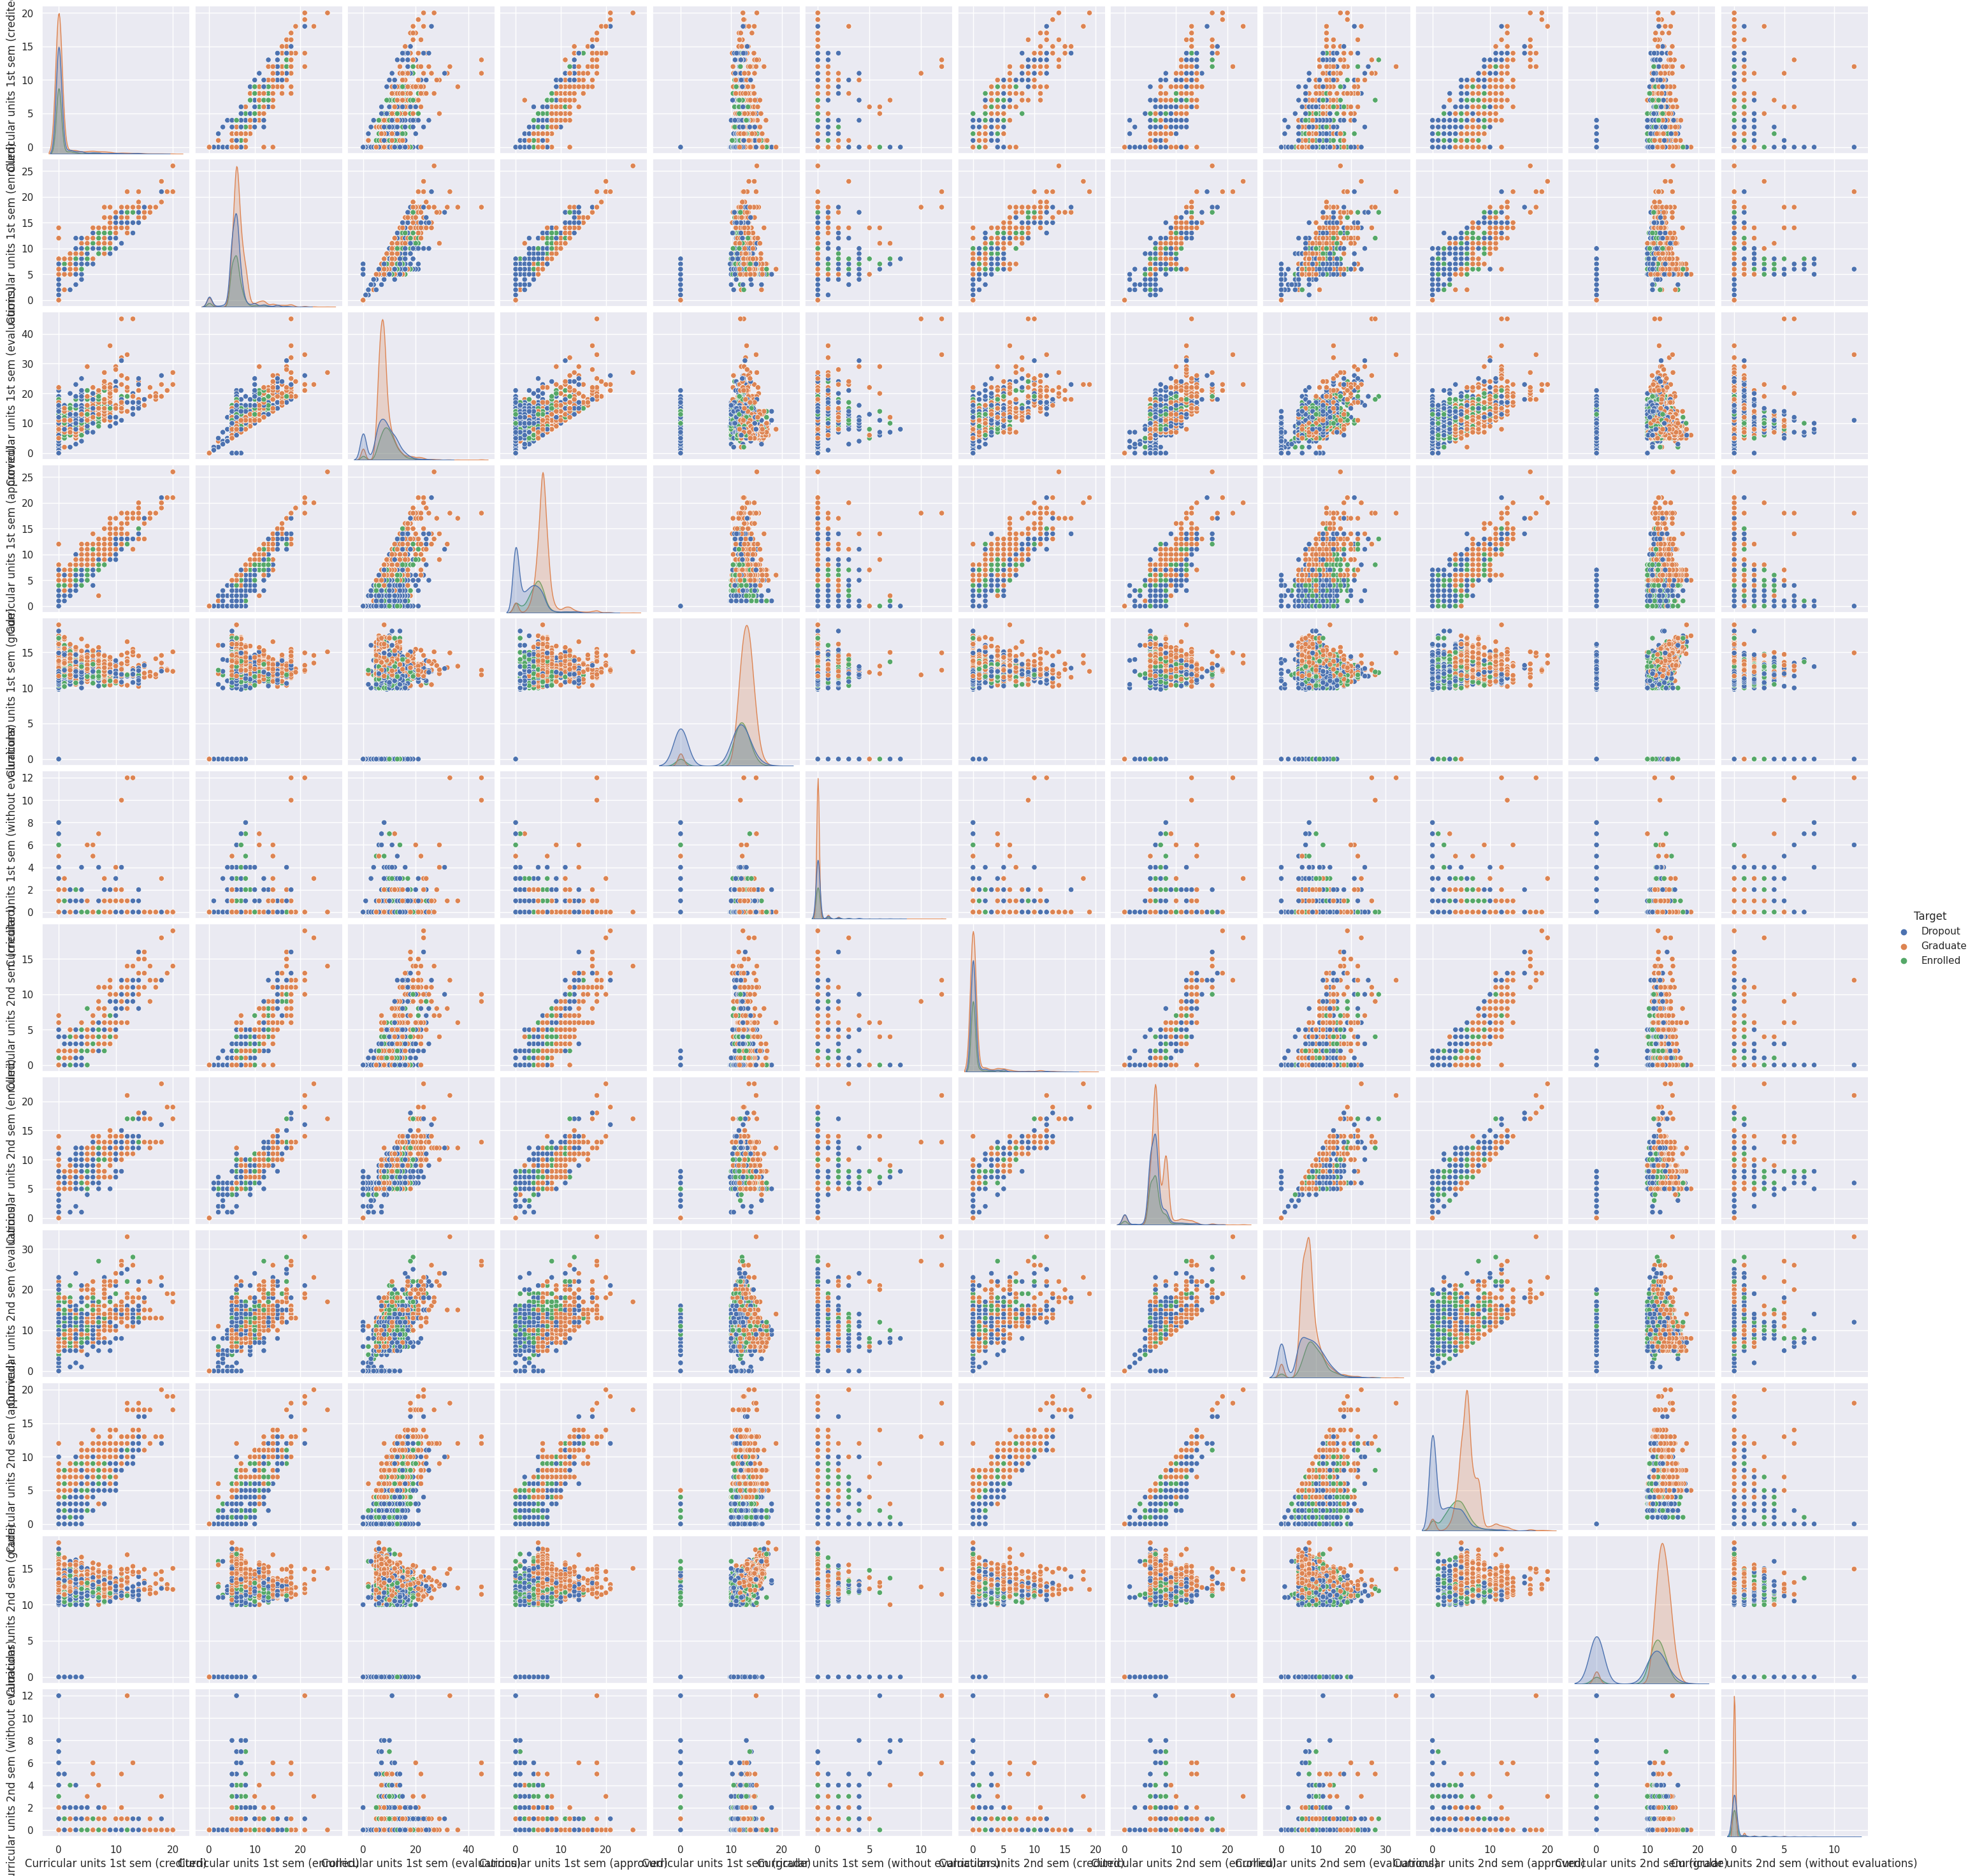

In [ ]:
sns.set()
sns.pairplot(df[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',"Target"]],hue="Target")

De lo anterior podemos observar que hay algunas relaciones entre los datos que segmentan el Target de forma evidente y otras que no tanto, sim embargo, no es una segmentación tan clara.

Ya que no se tienen ningun tipo de dato faltante, no es necesario realizar nignun tipo de limpieza del dataset.

Por lo cual nuestro conjunto de datos ya esta listo y podemos pasar a la siguiente fase correspondiente a la creación, entrenamiento y evaluación de modelos.